In [36]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.table import Table
from astropy.io import fits
from scipy.optimize import curve_fit
from clevar.match import output_matched_catalog
from clevar.catalog import ClCatalog

In [2]:
inpath = "/sps/lsst/groups/clusters/amico_validation_project/catalogs/"
rm_inpath = '/sps/lsst/users/tguillem/DESC/desc_april_2022/cluster_challenge/clevar_catalogs/redmapper/full_pmem/cosmoDC2_v1.1.4_redmapper_v0.8.1/'

In [3]:
am_path = inpath+'AMICO/amico_cats/amico_map_associations_flxzb_mag/mag_i/Catalog.fits'
rm_path = rm_inpath + 'Catalog.fits'

In [4]:
am = Table.read(am_path)
rm = Table.read(rm_path)

In [40]:
bins = np.linspace(0,100,50)

In [12]:
path = '/sps/lsst/groups/clusters/amico_validation_project/catalogs/matching_cats/amico_redmapper/mag_i/'

In [13]:
c1 = ClCatalog.read(path+'c1_p.fits', 'c1', full = True)
c2 = ClCatalog.read(path+'c2_p.fits', 'c2', full = True)

In [14]:
matching_folder = '/sps/lsst/groups/clusters/amico_validation_project/catalogs/matching_cats/amico_redmapper/mag_i/'

In [15]:
#output_matched_catalog(matching_folder+'c1_p.fits', matching_folder+'c2_p.fits',matching_folder+'output_catalog_' + 'p' +'.fits', c1, c2, matching_type='cross', overwrite=True)
c_merged_12 = ClCatalog.read(matching_folder+'output_catalog_' + 'p' + '.fits', 'merged',  full=True)

/sps/lsst/users/namourou/conda_clone_210223/descv1.1/clevar/clevar/catalog.py:280: UserWarning: id column missing, additional one is being created.
  warnings.warn(f"{id_name} column missing, additional one is being created.")


In [16]:
def f(x,a,b):
    return a*x+b

In [17]:
par, cov = curve_fit(f, c_merged_12['cat1_mass'], c_merged_12['cat2_mass'])

In [18]:
par

array([ 0.52273721, -2.55486658])

In [19]:
cov

array([[ 4.74019195e-06, -1.29065373e-04],
       [-1.29065373e-04,  4.97024269e-03]])

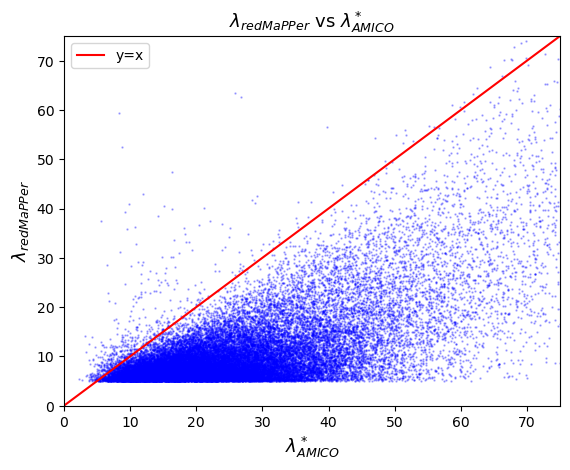

In [33]:
plt.scatter(c_merged_12['cat1_mass'], c_merged_12['cat2_mass'], s=0.5,alpha = 0.3, color = 'blue')
plt.plot(np.linspace(0,90), f(np.linspace(0,90),1,0), color = 'red', label = 'y=x')
plt.xlim([0,75])
plt.ylim([0,75])
plt.title('$\lambda_{redMaPPer}$ vs $\lambda^*_{AMICO}$', fontsize = 13)
plt.xlabel('$\lambda^*_{AMICO}$', fontsize = 13)
plt.ylabel('$\lambda_{redMaPPer}$', fontsize = 13)
plt.legend()
plt.savefig('/pbs/home/n/namourou/test_jupyter/cluster_challenge/plots/rich-rich.png', format='png', transparent=True)

In [21]:
c1 = am

In [22]:
c2 = rm

In [23]:
c2

id,ra,dec,z,mass,z_true,log_mass
int32,float64,float64,float32,float32,float32,float64
10,52.520436430812914,-25.717996124671657,0.5135129,190.70665,0.51072353,2.2803659439086914
18,56.920376528125075,-27.20434071042304,0.5712697,179.12813,0.5740297,2.2531638145446777
24,56.99849698116052,-26.7172081871169,1.040338,124.02715,1.0347759,2.0935168266296387
30,58.56362402841767,-27.429961828331713,0.63518524,167.33603,0.6426174,2.2235894203186035
71,58.35519782866568,-26.867687128773035,0.44230303,111.9147,0.43919736,2.048887252807617
73,57.76575707007693,-28.119101936484828,0.46697217,104.439766,0.4680865,2.0188658237457275
109,58.509466974185045,-26.989676182075844,0.4413634,103.49396,0.44349608,2.0149149894714355
116,54.494027152041674,-27.896589555863095,1.0629631,76.85877,1.0758829,1.8856934309005737
133,58.137368555958155,-27.199784884537003,1.037697,75.89771,1.0311339,1.8802286386489868


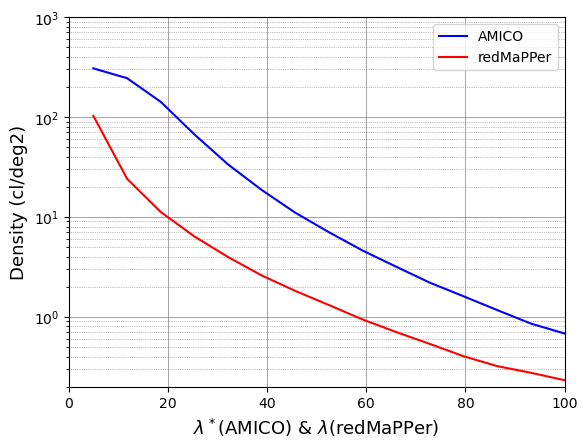

In [35]:
sky_area_sq_deg = 439.78986
rich_bins = np.linspace(5, 100, 15)
#rich_binsb = np.linspace(0, 75, 15)
cdf1 = np.searchsorted(c1["mass"], rich_bins, sorter=c1["mass"].argsort())
cdf1 = len(c1)-cdf1
#cdf1b = np.searchsorted(c1["mass"], rich_bins*par[0]+par[1], sorter=c1["mass"].argsort())
#cdf1b = len(c1)-cdf1b
cdf2 = np.searchsorted(c2["mass"], rich_bins, sorter=c2["mass"].argsort())
cdf2 = len(c2)-cdf2
g1, = plt.semilogy(rich_bins, cdf1 / sky_area_sq_deg, color = 'blue', label = 'AMICO')
#g1b, = plt.semilogy(rich_bins*par[0]+par[1], cdf1b / sky_area_sq_deg, color = 'blue', label = 'amico_rescaled', linestyle = '--')
g2, = plt.semilogy(rich_bins, cdf2 / sky_area_sq_deg, color = 'red', label = 'redMaPPer')
plt.xlabel("$\lambda^*$(AMICO) & $\lambda$(redMaPPer)", fontsize = 13);
plt.ylabel("Density (cl/deg2)", fontsize = 13);
plt.legend()
#plt.xscale('log')
plt.ylim([0.2,1000])
plt.xlim([0,100])
plt.grid(which='major', axis='both', linestyle='-', linewidth='0.5', color='grey')
plt.grid(which='minor', axis='both', linestyle=':', linewidth='0.5', color='grey')
plt.savefig('/pbs/home/n/namourou/test_jupyter/cluster_challenge/plots/density-amrm.png', format='png', transparent=True)

Text(0, 0.5, '$Density_{RM}/Density_{AM}$')

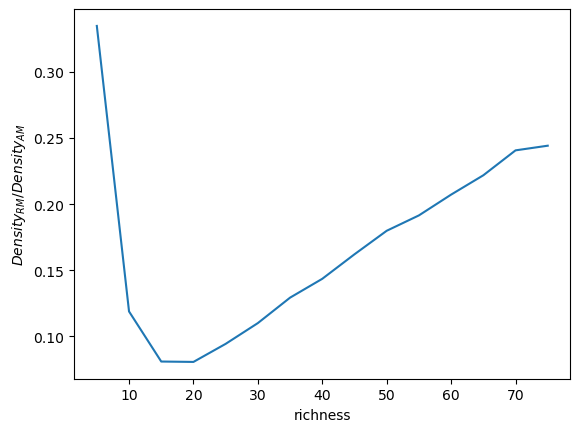

In [27]:
plt.plot(rich_bins, cdf2/cdf1)
plt.xlabel('richness')
plt.ylabel('$Density_{RM}/Density_{AM}$')